In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats.stats import pearsonr

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [146]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [147]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [148]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [149]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Price Distibution of House
Every house are first categorize on the base of there price. So lets see price distribution of various flat.

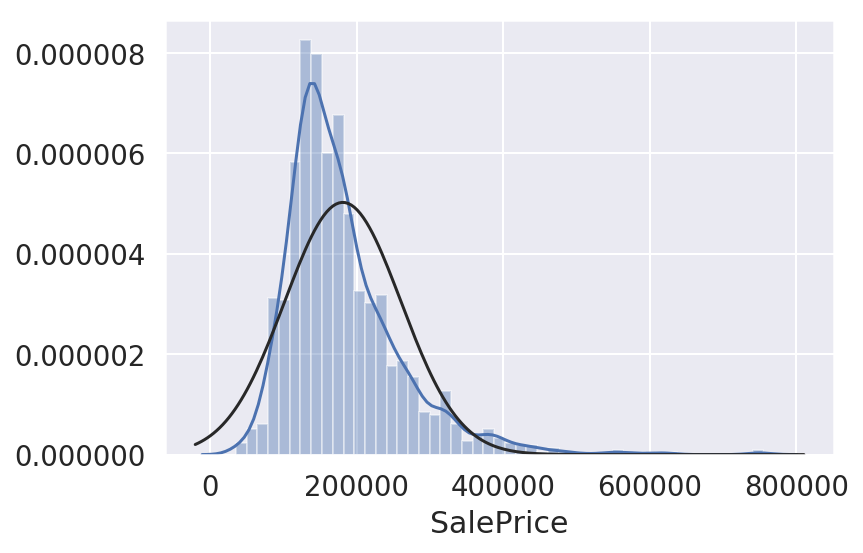

In [150]:
from scipy.stats import skew, skewtest, norm
sns.distplot(train['SalePrice'], fit=norm)

In [151]:
# Making the Sale price Normally distributed
train['SalePrice'] = np.log1p(train['SalePrice'])

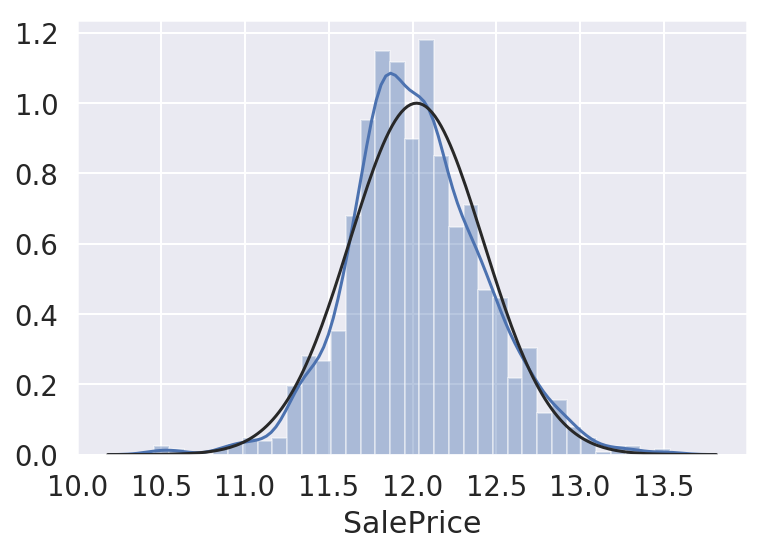

In [152]:
sns.distplot(train['SalePrice'], fit=norm)

## Any House or flat Price factor is related by its Area
So lets see flat price distribution with respect to the Area of the flat or house

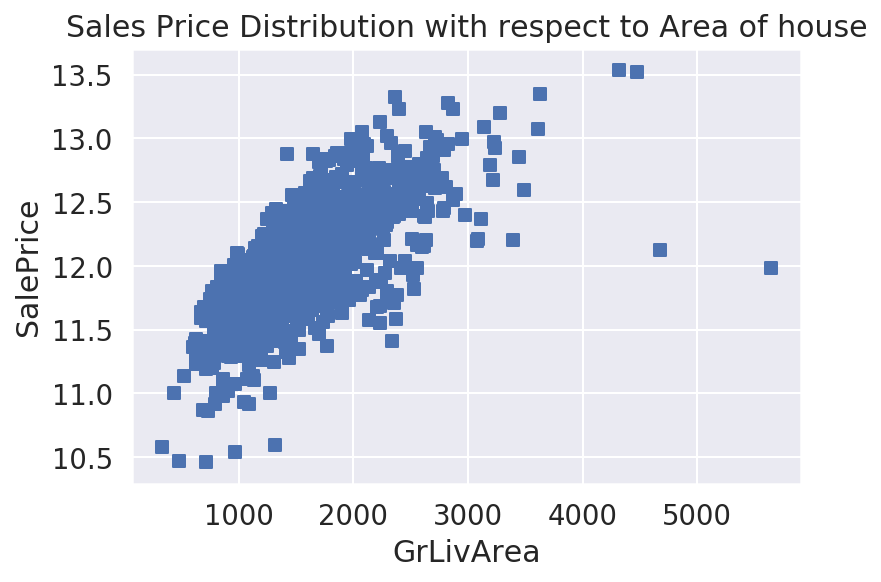

In [153]:
plt.scatter(train['GrLivArea'], train['SalePrice'], marker = "s")
plt.title("Sales Price Distribution with respect to Area of house")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [154]:
train = train[train['GrLivArea'] < 4500]

In [155]:
# We prefered only those data which has 'Normal' Sale Condition
train = train[train['SaleCondition'] == 'Normal']

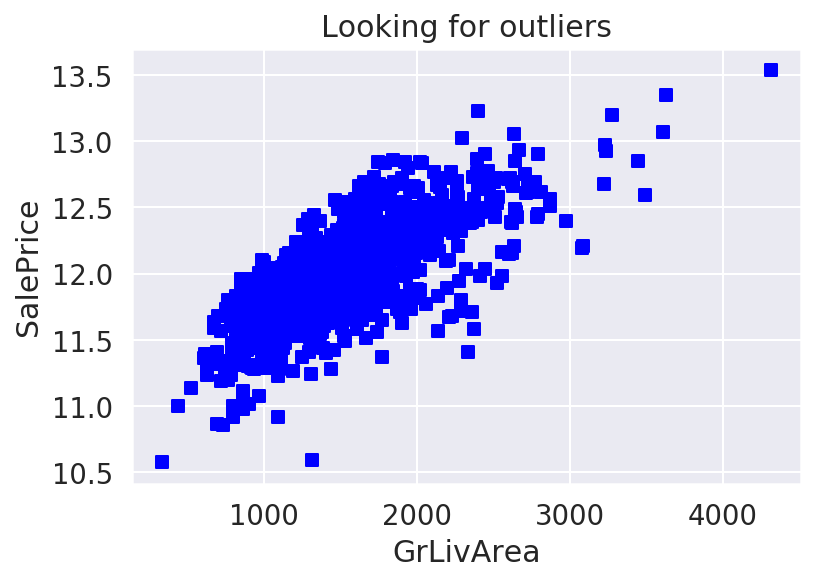

In [156]:
# After reomving the inwanted data i.e. outlier
plt.scatter(train['GrLivArea'], train['SalePrice'], c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

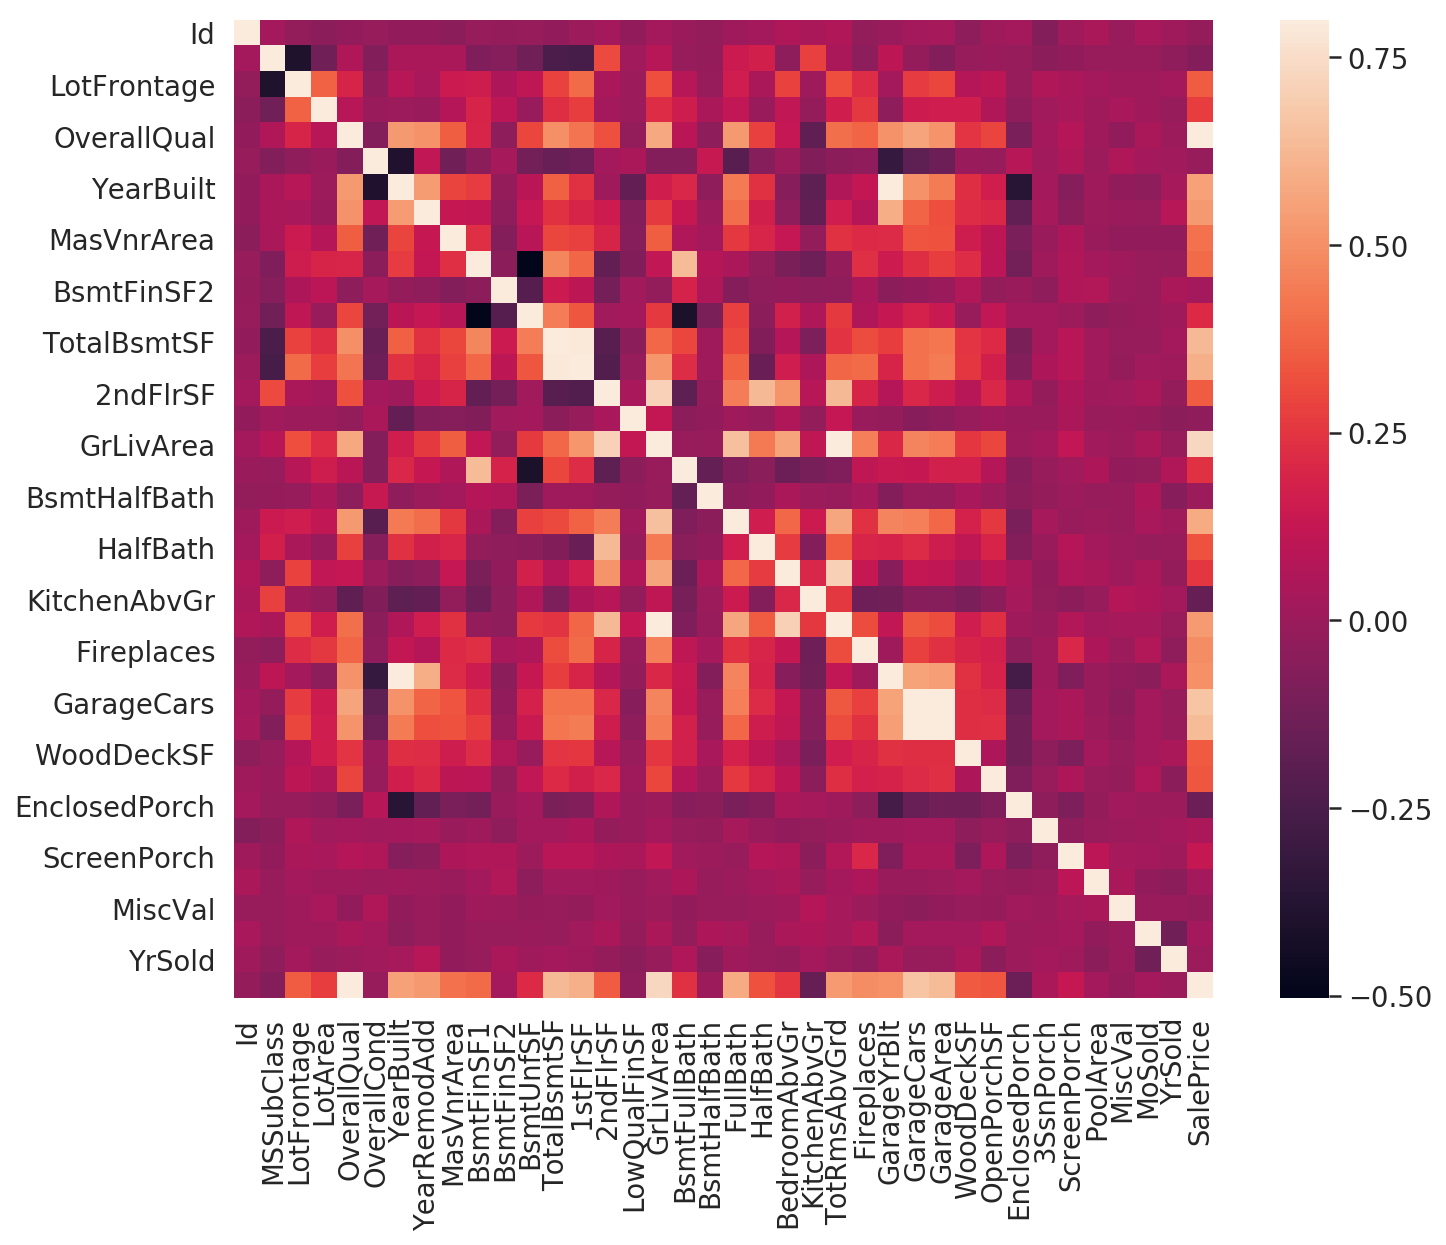

In [157]:
corrmatrix = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True)

## Relation of the SalePrice with other columns(Positively or Negatively correlated)
The column which are positively related wih SalePrice are :
1)OverallQual
2)GrLivArea
3)TotalBsmtSF
4)GarageCars
5)1stFlrSF
6)GarageArea
7)FullBath
8)TotRmsAbvGrd
9)YearBuilt

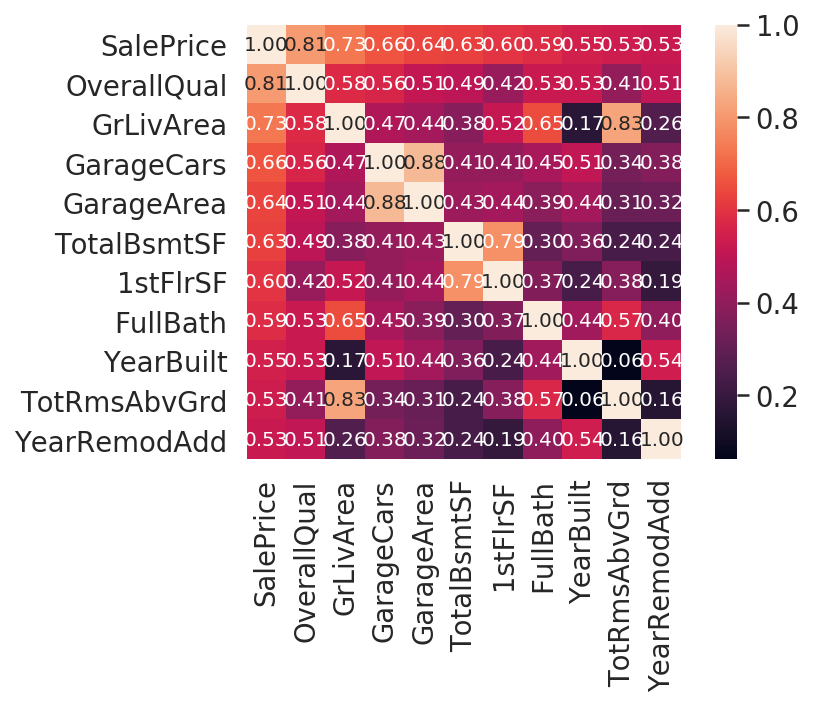

In [158]:
k = 11
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Eiminating the columns
Those columns which are more similar with each other, eliminate either one of them.
1) TotalBsmntSF and 1stFlrSF are very highly correlated
2) GarageCars and GarageArea are veryhighly correlated
3) GarageYrBlt and YearBuilt are very highly correlated
4) TotRmsAbvGrd and GrLivArea are very highly correlated

In [159]:
train_ID = train['Id']
test_ID = test['Id']

In [160]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.drop("TotRmsAbvGrd", axis = 1, inplace = True)
test.drop("TotRmsAbvGrd", axis = 1, inplace = True)
train.drop("GarageYrBlt", axis = 1, inplace = True)
test.drop("GarageYrBlt", axis = 1, inplace = True)
train.drop("GarageArea", axis = 1, inplace = True)
test.drop("GarageArea", axis = 1, inplace = True)

In [161]:
pd.set_option('display.max_rows', 500)
for i in train.columns:
    print(train[i].isnull().value_counts())

False    1198
Name: MSSubClass, dtype: int64
False    1198
Name: MSZoning, dtype: int64
False    961
True     237
Name: LotFrontage, dtype: int64
False    1198
Name: LotArea, dtype: int64
False    1198
Name: Street, dtype: int64
True     1127
False      71
Name: Alley, dtype: int64
False    1198
Name: LotShape, dtype: int64
False    1198
Name: LandContour, dtype: int64
False    1198
Name: Utilities, dtype: int64
False    1198
Name: LotConfig, dtype: int64
False    1198
Name: LandSlope, dtype: int64
False    1198
Name: Neighborhood, dtype: int64
False    1198
Name: Condition1, dtype: int64
False    1198
Name: Condition2, dtype: int64
False    1198
Name: BldgType, dtype: int64
False    1198
Name: HouseStyle, dtype: int64
False    1198
Name: OverallQual, dtype: int64
False    1198
Name: OverallCond, dtype: int64
False    1198
Name: YearBuilt, dtype: int64
False    1198
Name: YearRemodAdd, dtype: int64
False    1198
Name: RoofStyle, dtype: int64
False    1198
Name: RoofMatl, dtype: int64
F

In [162]:
ntrain = train.shape[0]
ntest = test.shape[0]

# Drop the 'SalePrice' from the train data.
y = train['SalePrice']

train.drop("SalePrice", axis = 1, inplace = True)

In [163]:
comb_data = pd.concat([train,test]).reset_index(drop=True)
comb_data.shape

(2657, 76)

In [164]:
print("Combined size is : {}".format(comb_data.shape))

Combined size is : (2657, 76)


In [165]:
# Columns with missing values in them out of 1460 rows
pd.set_option('display.max_columns', 500)
null_columns=train.columns[comb_data.isnull().any()]
result = comb_data[null_columns].isnull().sum().sort_values(ascending = False)
percent = (comb_data.isnull().sum()/comb_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([result, percent], axis=1, keys=['Total', 'Percent'], sort = True).sort_values(by = 'Percent', ascending=False)
missing_data.head(20)

,Total,Percent
PoolQC,2651.0,0.997742
MiscFeature,2556.0,0.961987
Alley,2479.0,0.933007
Fence,2126.0,0.800151
FireplaceQu,1293.0,0.486639
LotFrontage,464.0,0.174633
GarageQual,139.0,0.052315
GarageFinish,139.0,0.052315
GarageCond,139.0,0.052315
GarageType,137.0,0.051562


In [166]:
# Looking at the above Output we can see top four row i.e ['PoolQC', 'MiscFeature', 'Alley', 'Fence'] Consist more than 80% of data empty.
# So we can Delete or drop from our data...
comb_data.drop("PoolQC", axis = 1, inplace = True)
comb_data.drop("MiscFeature", axis = 1, inplace = True)
comb_data.drop("Alley", axis = 1, inplace = True)
comb_data.drop("Fence", axis = 1, inplace = True)

## Now Lets Deal with remaining columns with missing values.


In [167]:
# "FireplaceQu" mean no fire place is availabel.
comb_data["FireplaceQu"] = comb_data["FireplaceQu"].fillna("None")

In [168]:
comb_data["LotFrontage"].fillna(0, inplace=True)

In [169]:
comb_data['LotFrontage'].isnull().sum()#.value_counts()

0

In [170]:
train['FireplaceQu'].value_counts()

TA    286
Gd    285
Fa     30
Po     19
Ex     15
Name: FireplaceQu, dtype: int64

### GarageType, GarageFinish, GarageQual and GarageCond 
All this columns Show or Describe same parameter that is condition of Garage. So we can replace their missing value in single loop

In [171]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    comb_data[col] = comb_data[col].fillna('None')

### GarageYrBlt, GarageArea and GarageCars 
This all column describe only one parameter that is Structure of the Garage. So we can replace the missing value in one loop.

In [172]:
comb_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch'

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath
This columns show or Describe only parameter that is Basement. Since the house with no Basement we can replace the missing value as '0'.

In [173]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    comb_data[col] = comb_data[col].fillna(0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
As this columns explain only same parameter about Basement.

In [174]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    comb_data[col] = comb_data[col].fillna('None')

## MasVnrArea and MasVnrType
This columns explain about one parameter That is masonry veneer for these houses.
Since MasVnrArea is numerical  we can replace nan value but 0 and MasVnrType it is categorical columns we will replace nan value by None.

In [175]:
comb_data["MasVnrType"] = comb_data["MasVnrType"].fillna("None")
comb_data["MasVnrArea"] = comb_data["MasVnrArea"].fillna(0)

## MSZoning 
Looking at this number of category present the 'RL'  is the largest. So we will replace the nan value by 'RL'
RL         2069
RM          431
FV          113
RH           21
C (all)      19

In [176]:
comb_data['MSZoning'] = comb_data['MSZoning'].fillna(comb_data['MSZoning'].mode()[0])

## Utilities 
this feature has only 2 missing value and it explain The type of utilites will be given with house. This feature will not much use full in predicting value, so we can drop it.

In [177]:
comb_data = comb_data.drop(['Utilities'], axis=1)

## Functional
This feature explain the Home Functionality rating, and its column contain most high contribution as 'Typ'
So we will replace the Nan value but Typ

In [178]:
comb_data["Functional"] = comb_data["Functional"].fillna("Typ")

## Electrical and KitchenQual
This columns has maximum number as 'SBrk' and 'KitchenQual' resp, So we can replace value which only 1 using Mode.

In [179]:
comb_data['Electrical'] = comb_data['Electrical'].fillna(comb_data['Electrical'].mode()[0])

In [180]:
# Same as above this column also contain only one value as missing value.
comb_data['KitchenQual'] = comb_data['KitchenQual'].fillna(comb_data['KitchenQual'].mode()[0])

## Exterior1st and Exterior2nd
Again like above column this column also contain only 1 missing value. We can replace missing value using mode method.


In [181]:
comb_data['Exterior1st'] = comb_data['Exterior1st'].fillna(comb_data['Exterior1st'].mode()[0])
comb_data['Exterior2nd'] = comb_data['Exterior2nd'].fillna(comb_data['Exterior2nd'].mode()[0])

## SaleType
Fill the missing value using Mode method since only one category is maximum.

In [182]:
comb_data['SaleType'] = comb_data['SaleType'].fillna(comb_data['SaleType'].mode()[0])

## MSSubClass 
This columns gives description as building class. In this Na means that house has not given class, so we will replace the nan value as None

In [183]:
comb_data['MSSubClass'] = comb_data['MSSubClass'].fillna("None")

## GarageCars
In this columns we will replace null value as 0.

In [184]:

comb_data["GarageCars"].fillna(0, inplace=True)

In [185]:
comb_data_na = (comb_data.isnull().sum() / len(comb_data)) * 100
comb_data_na = comb_data_na.drop(comb_data_na[comb_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :comb_data_na})
missing_data.head()

,Missing Ratio


# Feature Engeneering value.

## Since this data contain both numerical and categorical columns. First we will convert categorical column into numerical.  

In [186]:
# Lets check which are numerical and categorical columns
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2657 entries, 0 to 2656
Data columns (total 71 columns):
MSSubClass       2657 non-null int64
MSZoning         2657 non-null object
LotFrontage      2657 non-null float64
LotArea          2657 non-null int64
Street           2657 non-null object
LotShape         2657 non-null object
LandContour      2657 non-null object
LotConfig        2657 non-null object
LandSlope        2657 non-null object
Neighborhood     2657 non-null object
Condition1       2657 non-null object
Condition2       2657 non-null object
BldgType         2657 non-null object
HouseStyle       2657 non-null object
OverallQual      2657 non-null int64
OverallCond      2657 non-null int64
YearBuilt        2657 non-null int64
YearRemodAdd     2657 non-null int64
RoofStyle        2657 non-null object
RoofMatl         2657 non-null object
Exterior1st      2657 non-null object
Exterior2nd      2657 non-null object
MasVnrType       2657 non-null object
MasVnrArea       2657 no

### Some columns has numrical in nature but they need to convert to string format for easy handling for us.

In [187]:
#MSSubClass=The building class
comb_data['MSSubClass'] = comb_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
comb_data['OverallCond'] = comb_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
comb_data['YrSold'] = comb_data['YrSold'].astype(str)
comb_data['MoSold'] = comb_data['MoSold'].astype(str)

### Now applying the Label encoding on the catedorical features.

In [188]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(comb_data[c].values)) 
    comb_data[c] = lbl.transform(list(comb_data[c].values))

# shape        
print('Shape all_data: {}'.format(comb_data.shape))

Shape all_data: (2657, 71)


### Adding the columns which are important to determine house price, thus adding the basement, first floor and second floor can increase house price.

In [189]:
comb_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorc

In [190]:
# Adding total sqfootage feature 
comb_data['TotalSF'] = comb_data['TotalBsmtSF'] + comb_data['1stFlrSF'] + comb_data['2ndFlrSF']

### Degree of skewness of each feature in datasets

In [191]:
numeric_feats = comb_data.dtypes[comb_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = comb_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,20.954704
PoolArea,20.181877
LotArea,13.039157
LowQualFinSF,12.720953
3SsnPorch,11.886234
LandSlope,4.913743
KitchenAbvGr,4.423965
BsmtFinSF2,4.082458
EnclosedPorch,3.963624
ScreenPorch,3.952916


In [192]:
comb_data.shape

(2657, 72)

In [193]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    comb_data[feat] = boxcox1p(comb_data[feat], lam)

There are 53 skewed numerical features to Box Cox transform


### Getting dummy categorical features 

In [194]:
comb_data = pd.get_dummies(comb_data)
print(comb_data.shape)

(2657, 206)


Getting the new train and test sets.

In [195]:
train = comb_data[:ntrain]
test = comb_data[ntrain:]

In [196]:
test.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1198,2.055642,6.221214,20.479373,0.730463,1.540963,0.0,2.055642,2.055642,14.121376,14.121376,0.000000,1.540963,1.820334,1.820334,1.820334,1.540963,2.055642,10.105326,1.540963,7.397498,8.780689,11.775114,1.820334,0.730463,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,1.540963,2.259674,0.000000,1.540963,1.540963,0.730463,2.055642,2.055642,1.194318,7.338607,0.000000,0.0,0.0,7.020909,0.0,0.000000,2.602594,1.820334,13.818294,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,

# Modeling

### Import librairies

In [197]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [198]:
# Applying Cross Validation function
# We have use cross-validation function of Sklearn. 

n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Lasso Regression
This model is more prone for outlier, so we have to make them more suitable for outlier this con be done using Robustscaler() method in in pipeline

In [199]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0949 (0.0074)



### Elastic Net Regression
Just like Lasso, for Elastic we have make it more robust

In [200]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0949 (0.0074)



### Kernel Ridge Regression

In [201]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0988 (0.0062)



### Gradient Boosting Regression

In [202]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)


In [203]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1003 (0.0084)



In [204]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(GBoost)

In [205]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1003 (0.0084)



In [206]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(GBoost)

In [207]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1003 (0.0084)



## Stacking models

### Averaged base models class
Doing this by creating a class and defining function of fit and predict.

In [208]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class  AveragingModels(BaseEstimator,  RegressorMixin,  TransformerMixin):
    def  __init__(self,  models):
                 self.models  =  models
        
                  # we define clones of the original models to fit the data in# we define clones of the  
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

Since our base models are ENet, GBoost, KRR and lasso, we will take average of this models and then implement in above class

In [209]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)

In [210]:
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0920 (0.0071)



## Final Training and Prediction

### StackedRegressor:

In [211]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [212]:
averaged_models.fit(train.values, y)
average_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y, average_train_pred))

0.06460938463270069


### XGBoost:

In [217]:
model_xgb.fit(train, y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y, xgb_train_pred))

0.07692742515980902


### LightGBM:

In [219]:
model_lgb.fit(train, y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y, lgb_train_pred))

0.05746726249773509


In [220]:
print('RMSLE score on train data:')
print(rmsle(y,average_train_pred*0.70 + xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.06302147197084605


### Ensemble prediction:

In [221]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

### Submission

In [225]:
sub_1 = pd.DataFrame()
sub_1['Id'] = test_ID
sub_1['SalePrice'] = ensemble
sub_1.to_csv('submission.csv',index=False)

In [226]:
sub_1.head()

,Id,SalePrice
0,1461,117003.154892
1,1462,160334.423165
2,1463,187114.995323
3,1464,196032.109974
4,1465,185375.967762
